# Lab 5 Data Analysis
Group: IP-91

Var: 6

Students:
- Geleshko D.
- Vlasov A.

## Import

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Config

In [76]:
np.random.seed(6)

# pd.set_option("display.max_columns", None)
pd.options.display.float_format ="{:,.3f}".format

# Task 1

## Create two TimeSeries

In [77]:
data1 = pd.Series(np.square(np.linspace(0, 5, 16)).astype(np.float32),
                    index=pd.date_range("2021-11-11 14:10:00", periods=16, freq="s"),
                    name="x1")
data1

2021-11-11 14:10:00    0.000
2021-11-11 14:10:01    0.111
2021-11-11 14:10:02    0.444
2021-11-11 14:10:03    1.000
2021-11-11 14:10:04    1.778
2021-11-11 14:10:05    2.778
2021-11-11 14:10:06    4.000
2021-11-11 14:10:07    5.444
2021-11-11 14:10:08    7.111
2021-11-11 14:10:09    9.000
2021-11-11 14:10:10   11.111
2021-11-11 14:10:11   13.444
2021-11-11 14:10:12   16.000
2021-11-11 14:10:13   18.778
2021-11-11 14:10:14   21.778
2021-11-11 14:10:15   25.000
Freq: S, Name: x1, dtype: float32

In [78]:
data2 = pd.Series(np.linspace(0, 5, data1_size).astype(np.float32),
                    index=pd.date_range("2021-11-11 14:10:01", periods=16, freq="s"),
                    name="x2")
data2

2021-11-11 14:10:01   0.000
2021-11-11 14:10:02   0.333
2021-11-11 14:10:03   0.667
2021-11-11 14:10:04   1.000
2021-11-11 14:10:05   1.333
2021-11-11 14:10:06   1.667
2021-11-11 14:10:07   2.000
2021-11-11 14:10:08   2.333
2021-11-11 14:10:09   2.667
2021-11-11 14:10:10   3.000
2021-11-11 14:10:11   3.333
2021-11-11 14:10:12   3.667
2021-11-11 14:10:13   4.000
2021-11-11 14:10:14   4.333
2021-11-11 14:10:15   4.667
2021-11-11 14:10:16   5.000
Freq: S, Name: x2, dtype: float32

## Slicing

In [79]:
data1["2021-11-11 14:10:03":"2021-11-11 14:10:07"]

2021-11-11 14:10:03   1.000
2021-11-11 14:10:04   1.778
2021-11-11 14:10:05   2.778
2021-11-11 14:10:06   4.000
2021-11-11 14:10:07   5.444
Freq: S, Name: x1, dtype: float32

In [80]:
data2["2021-11-11 14:10:09":]

2021-11-11 14:10:09   2.667
2021-11-11 14:10:10   3.000
2021-11-11 14:10:11   3.333
2021-11-11 14:10:12   3.667
2021-11-11 14:10:13   4.000
2021-11-11 14:10:14   4.333
2021-11-11 14:10:15   4.667
2021-11-11 14:10:16   5.000
Freq: S, Name: x2, dtype: float32

## Merging

In [81]:
df1 = pd.merge(data1, data2, left_index=True, right_index=True)
df1

,x1,x2
2021-11-11 14:10:01,0.111,0.000
2021-11-11 14:10:02,0.444,0.333
2021-11-11 14:10:03,1.000,0.667
2021-11-11 14:10:04,1.778,1.000
2021-11-11 14:10:05,2.778,1.333
2021-11-11 14:10:06,4.000,1.667
2021-11-11 14:10:07,5.444,2.000
2021-11-11 14:10:08,7.111,2.333
2021-11-11 14:10:09,9.000,2.667
2021-11-11 14:10:10,11.111,3.000


In [82]:
df2 = pd.merge_asof(data1, data2, left_index=True, right_index=True).fillna(method="bfill", axis=0)
df2

,x1,x2
2021-11-11 14:10:00,0.000,0.000
2021-11-11 14:10:01,0.111,0.000
2021-11-11 14:10:02,0.444,0.333
2021-11-11 14:10:03,1.000,0.667
2021-11-11 14:10:04,1.778,1.000
2021-11-11 14:10:05,2.778,1.333
2021-11-11 14:10:06,4.000,1.667
2021-11-11 14:10:07,5.444,2.000
2021-11-11 14:10:08,7.111,2.333
2021-11-11 14:10:09,9.000,2.667


# Task 2

In [83]:
df = pd.read_csv("../data/Delhi_Climate.csv", index_col="date", parse_dates=True, dtype=np.float32)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,"1,015.667"
2013-01-02,7.400,92.000,2.980,"1,017.800"
2013-01-03,7.167,87.000,4.633,"1,018.667"
2013-01-04,8.667,71.333,1.233,"1,017.167"
2013-01-05,6.000,86.833,3.700,"1,016.500"
...,...,...,...,...
2016-12-28,17.217,68.043,3.548,"1,015.565"
2016-12-29,15.238,87.857,6.000,"1,016.905"
2016-12-30,14.095,89.667,6.267,"1,017.905"


In [84]:
df.index.dtype, df.dtypes

(dtype('<M8[ns]'),
 meantemp        float32
 humidity        float32
 wind_speed      float32
 meanpressure    float32
 dtype: object)

## Plots of humidity

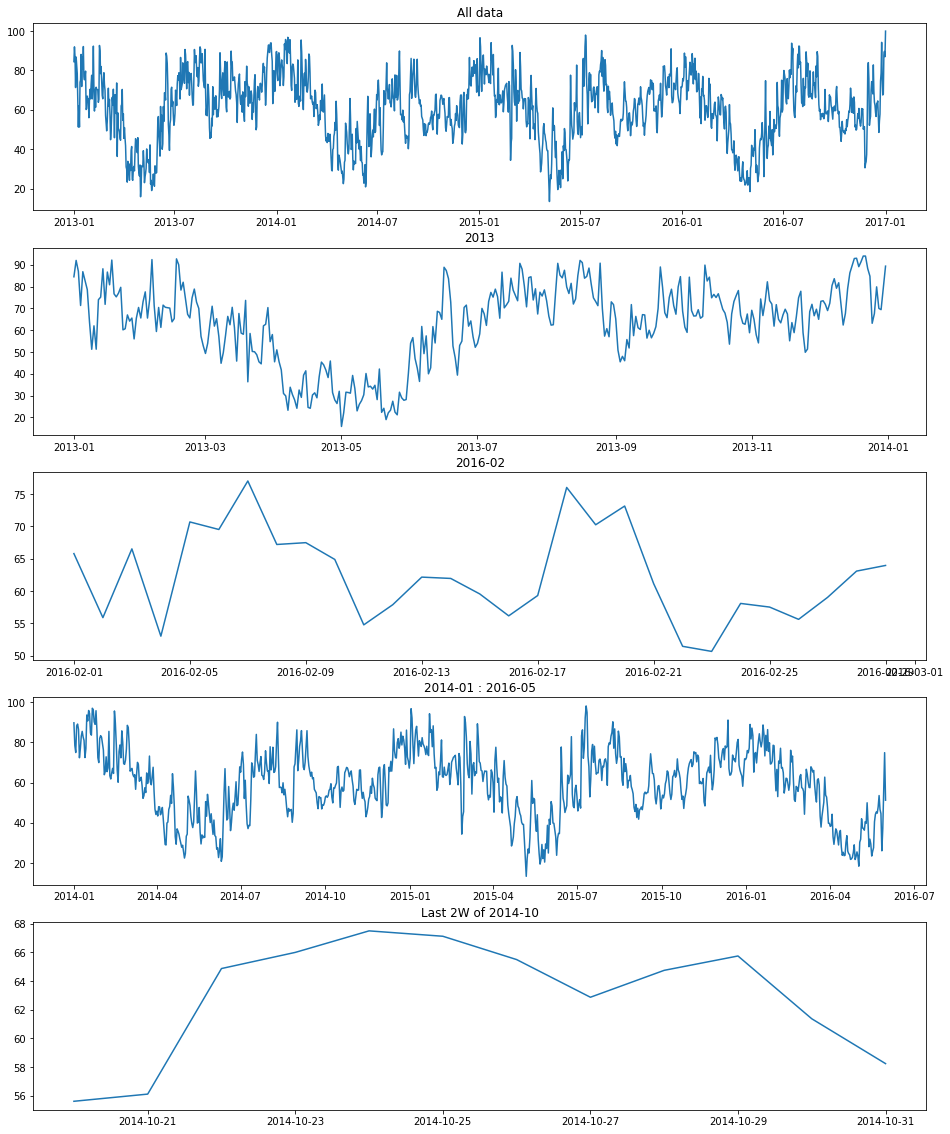

In [85]:
plt.rcParams["figure.figsize"] = (16, 20)
fig, axes = plt.subplots(5, 1)

axes[0].plot(df["humidity"])
axes[0].set_title("All data")

axes[1].plot(df["humidity"].loc["2013"])
axes[1].set_title("2013")

axes[2].plot(df["humidity"].loc["2016-02"])
axes[2].set_title("2016-02")

axes[3].plot(df["humidity"].loc["2014-01":"2016-05"])
axes[3].set_title("2014-01 : 2016-05")

axes[4].plot(df["humidity"].loc["2014-10"].last("2W"))
axes[4].set_title("Last 2W of 2014-10")

plt.show()

## Mean wind speed

In [87]:
# Mean wind speed in 2015
df["wind_speed"].loc["2015"].mean()

6.4806036949157715

In [88]:
# Mean wind speed in 2014, monthly
df["wind_speed"].loc["2014"].resample("M").mean()

date
2014-01-31    5.561
2014-02-28    6.402
2014-03-31    7.124
2014-04-30    8.869
2014-05-31    8.577
2014-06-30   10.111
2014-07-31    7.529
2014-08-31    7.665
2014-09-30    8.055
2014-10-31    3.988
2014-11-30    3.127
2014-12-31    4.134
Freq: M, Name: wind_speed, dtype: float32

In [95]:
# Mean wind speed during autumn 2016, weekly
df["wind_speed"].loc["2016-09":"2016-11"].resample("W").mean()

date
2016-09-04   10.435
2016-09-11   11.278
2016-09-18    8.521
2016-09-25    4.439
2016-10-02    3.018
2016-10-09    6.299
2016-10-16    8.676
2016-10-23    9.419
2016-10-30    6.618
2016-11-06    2.906
2016-11-13    5.911
2016-11-20    5.343
2016-11-27    9.664
2016-12-04    4.898
Freq: W-SUN, Name: wind_speed, dtype: float32